### Exploración y predicción del dataset Diabetes

Hacemos las importaciones de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Posteriormente cargamos el CSV de Diabetes y definimos la cantidad de datos en el train y en el test

In [ ]:
# Cargar los datos
df = pd.read_csv('diabetes.csv')

# Dividir los datos en características (X) y etiquetas (y)
#X = df.drop('Outcome', axis=1)
#y = df['Outcome']


### Exploración

Visualización de las clases para obtener los resultados de las personas con o sin diabetes

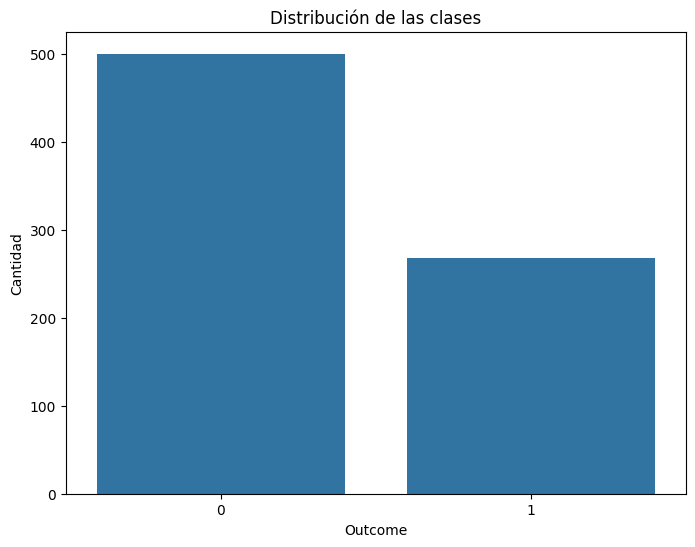

In [ ]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Outcome')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
outcomes = df['Outcome'].value_counts()
print(outcomes)

Outcome
0    500
1    268
Name: count, dtype: int64


Algunos resultados no incluyen el campo de insulina que es importante para la predicción. Se requiere hacer una transformación de los datos.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

dfd = df.describe()
with open('tabla.tex', 'w') as f:
    f.write(dfd.to_latex())

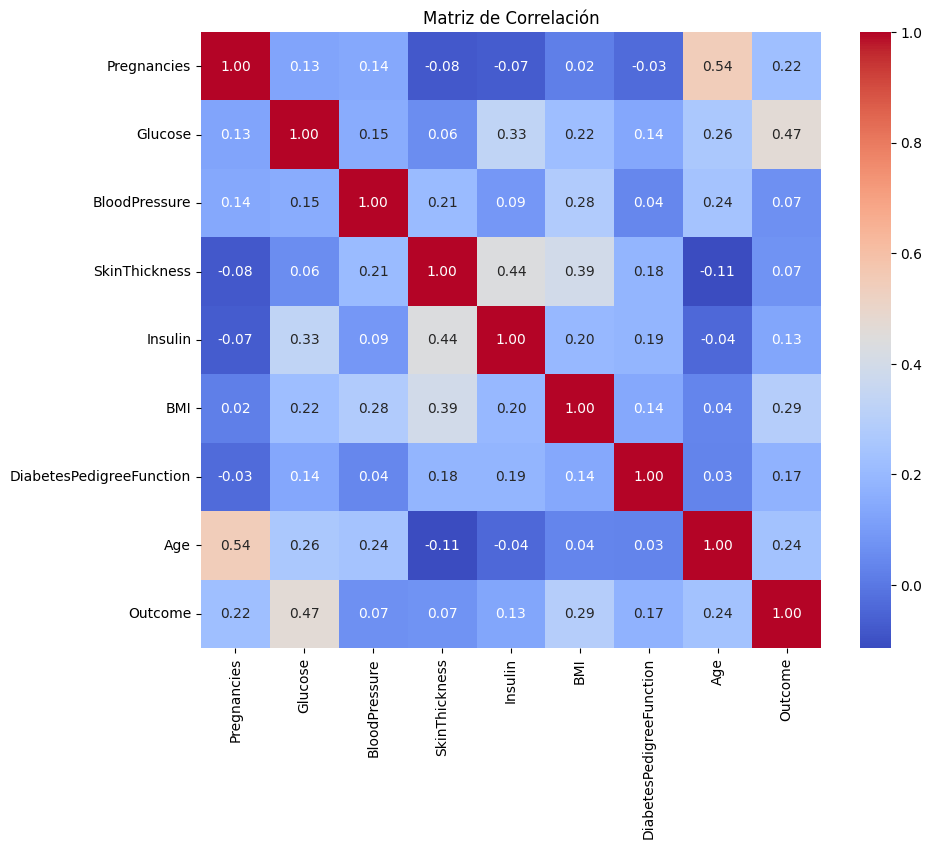

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()
# Graficar la matriz de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

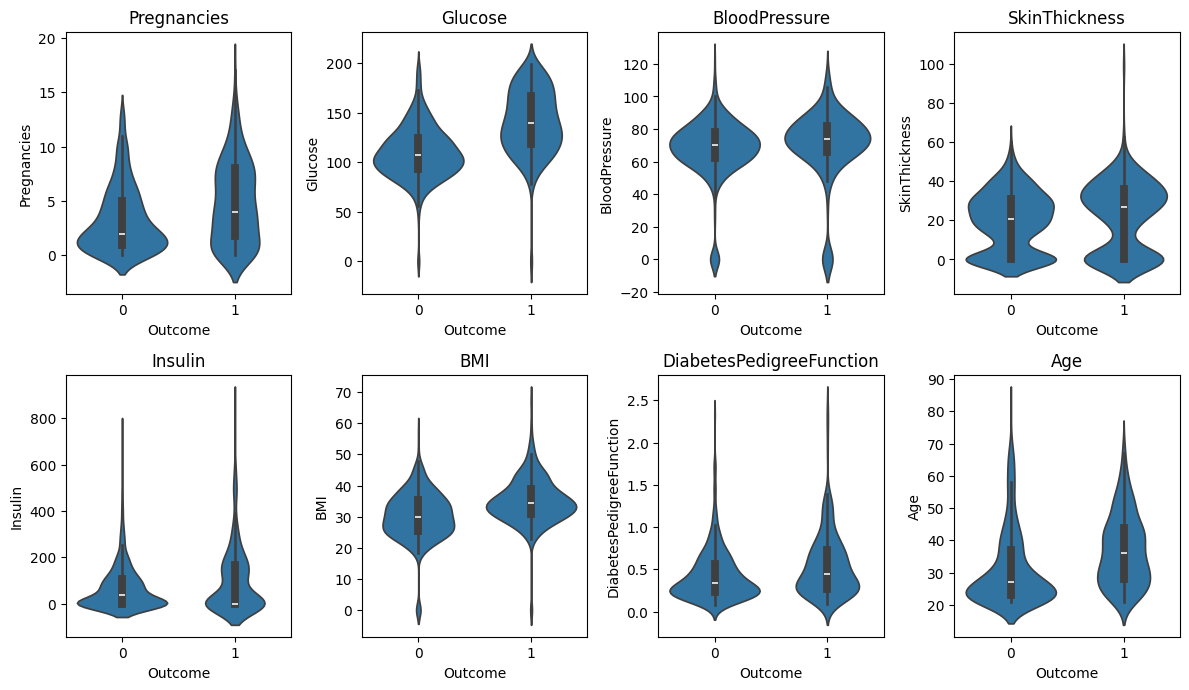

In [ ]:
# Visualize the distribution of all features using violin plots
plt.figure(figsize=(12, 10))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

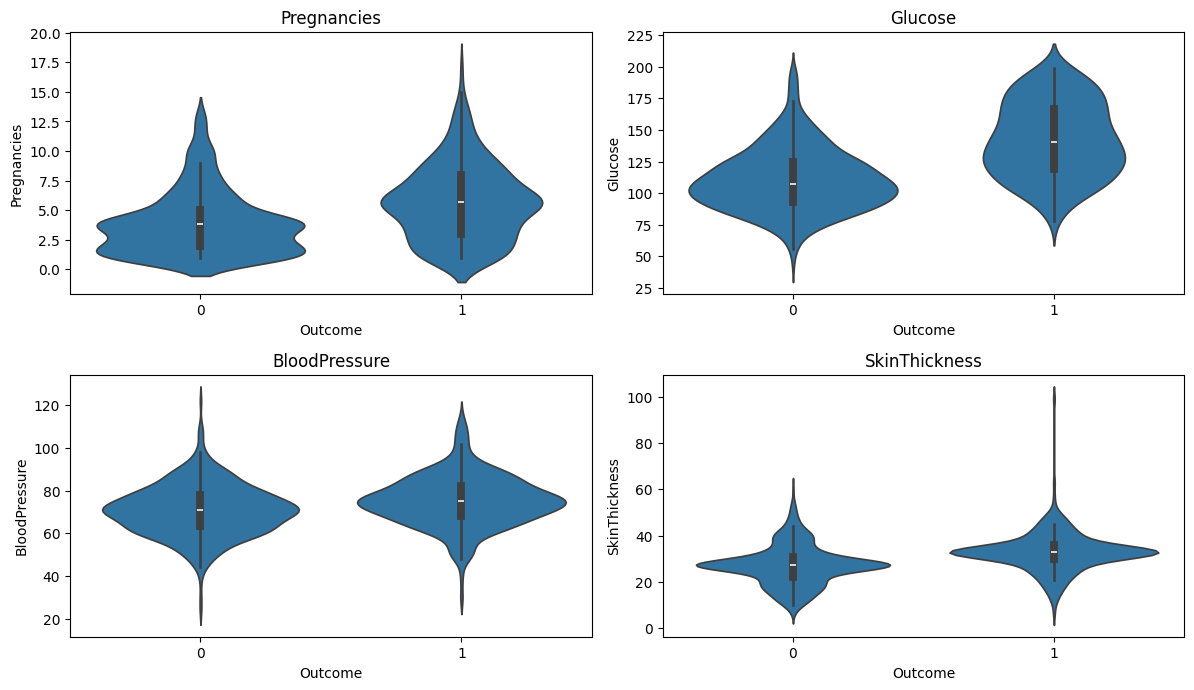

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data

# Visualize the distribution of features 1-6
plt.figure(figsize=(12, 10))

for i, col in enumerate(df.columns[0:4]):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()



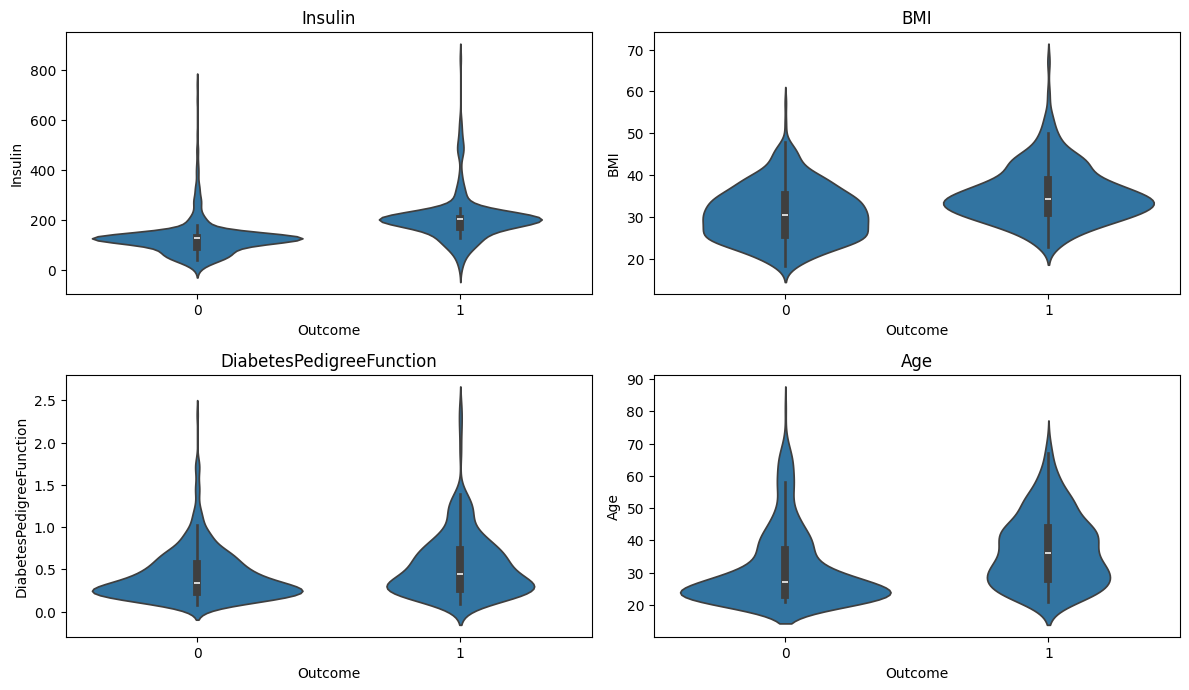

In [ ]:
# Visualize the distribution of features 7-12
plt.figure(figsize=(12, 10))

for i, col in enumerate(df.columns[4:-1]):
    plt.subplot(3, 2, i+1)
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

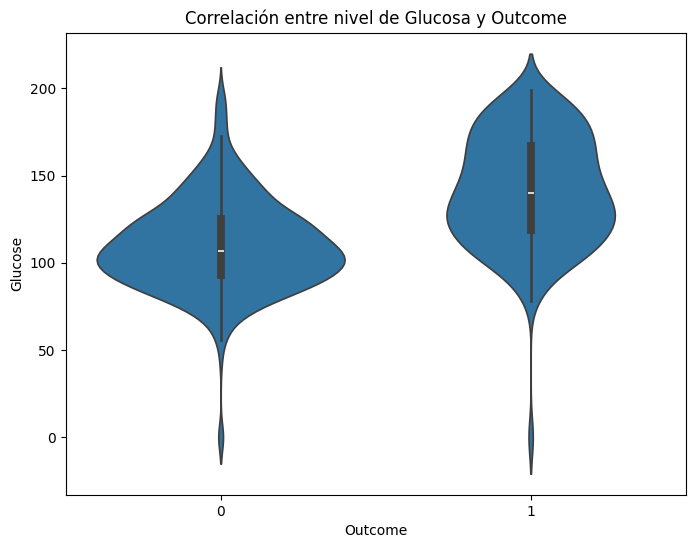

In [ ]:
# Visualize the correlation between glucose and Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df)

plt.title('Correlación entre nivel de Glucosa y Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


### Obtenemos el train y el test data

In [ ]:
# Replace 0 with NaN for columns other than 'Outcome'
df.loc[:, df.columns != 'Outcome'] = df.loc[:, df.columns != 'Outcome'].replace(0, pd.NA)

# Calculate means by Outcome for each column
means_by_outcome = df.groupby('Outcome').mean()

# Iterate through columns (excluding 'Outcome') and replace NaN with respective means
for col in df.columns:
    if col != 'Outcome':
        for outcome, mean in means_by_outcome[col].items():
            df.loc[(df[col].isnull()) & (df['Outcome'] == outcome), col] = mean

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

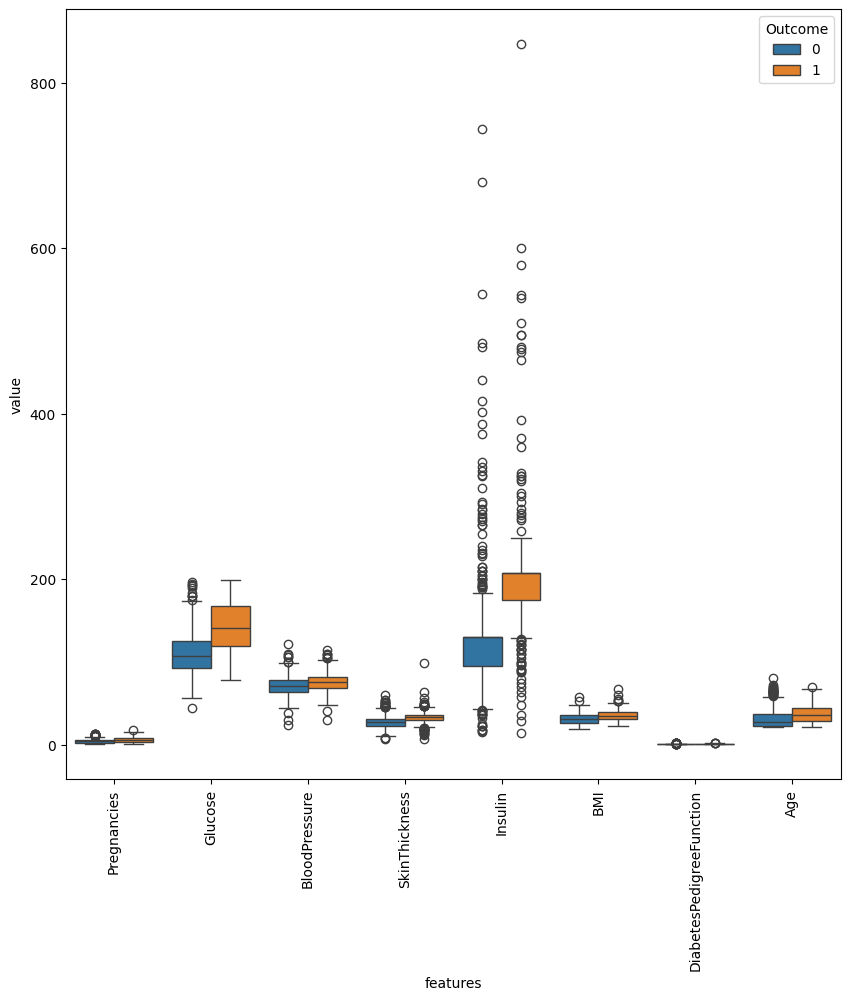

In [ ]:
plt.figure(figsize=(10,10))
data = pd.melt(df,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
sns.boxplot(x="features", y="value", hue="Outcome", data=data)
plt.xticks(rotation=90)

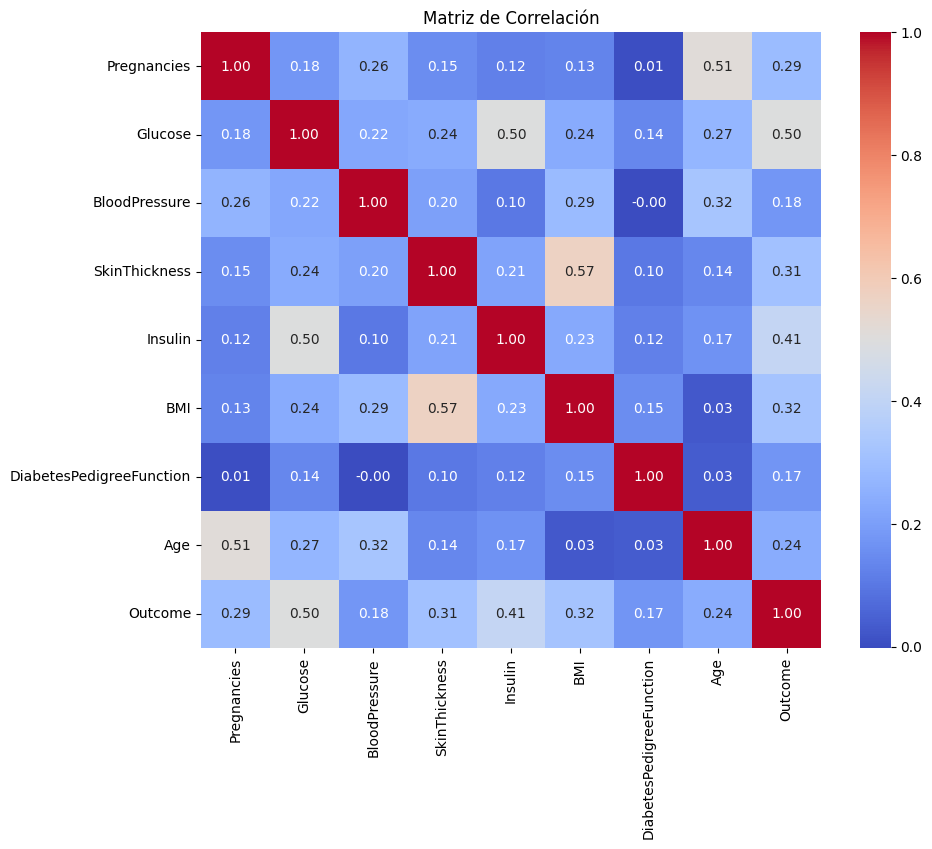

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()
# Graficar la matriz de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = df["Outcome"]

# Submuestreo: Definirles la media a los datos con Outcome igual a 0
X_train_0 = X[y == 0].sample(n=sum(y == 1), random_state=42)
X_train_1 = X[y == 1]
y_train_0 = pd.Series([0] * len(X_train_0), name='Outcome')
y_train_1 = pd.Series([1] * len(X_train_1), name='Outcome')

# Unir los datos de entrenamiento balanceados
X_train_balanced = pd.concat([X_train_0, X_train_1])
y_train_balanced = pd.concat([y_train_0, y_train_1])

X_train, X_test, y_train, y_test = train_test_split(X_train_balanced, y_train_balanced, random_state=42, test_size=0.20)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regresión Logistica

In [ ]:
Lo# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8148148148148148
Precision: 0.8085106382978723
Recall: 0.7755102040816326


### KNN

## Prueba 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8240740740740741
Precision: 0.7884615384615384
Recall: 0.8367346938775511


## Prueba 2

In [92]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8240740740740741
Precision: 0.8125
Recall: 0.7959183673469388


## Prueba 3

In [93]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8333333333333334
Precision: 0.8297872340425532
Recall: 0.7959183673469388


### Redes Neuronales

In [ ]:
# Hiperparámetros
hidden_layer_sizes = (100, 100, 100)
batch_size = 64
learning_rate_init = 0.001
max_iter = 10
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8240740740740741
Precision: 0.8125
Recall: 0.7959183673469388


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
